In [ ]:
#= グラフ描画パッケージ
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("Measures")
=#

In [1]:
using Plots
using Pkg

In [2]:
using Measures #font size

gr(
    titlefont=Plots.font("Arial", 15),
    legendfont=Plots.font("Arial", 10),
    guidefont=Plots.font("Arial", 15),
    tickfont=Plots.font("Arial", 10)
)

Plots.GRBackend()

In [3]:
function phi(l,a) # l:lambda, a:Lambda
    return ((2*pi*1.5/l) - (pi/a))*10000
end

phi (generic function with 1 method)

In [4]:
function alpha(k,p)
    return sqrt(Complex(k*k-p*p))
end

alpha (generic function with 1 method)

In [5]:
function reflect(a,k,l,phi) # 一様FBGの反射率 a:alpha, k:結合定数, l:FBG長
    b = -1 * im * k * sinh(a*l)
    c = a * cosh(a*l) + im * phi * sinh(a*l)
    return abs2(b/c)
end

reflect (generic function with 1 method)

In [6]:
function reflect_c(a,k,l,phi) # 複素反射係数
    b = -1 * im * k * sinh(a*l)
    c = a * cosh(a*l) + im * phi * sinh(a*l)
    return b/c
end

reflect_c (generic function with 1 method)

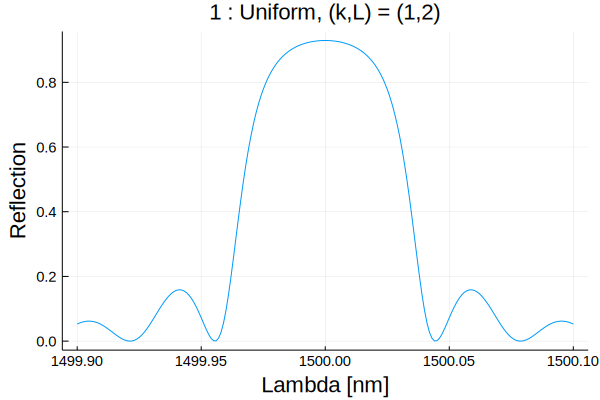

In [7]:
# 1_amplitude
del = 10^-6 # 波長の分割間隔
ran = 1.5-del*100:del:1.5+del*100 # 波長の範囲
x = [1000n for n in ran]
y = [reflect(alpha(1,phi(xx,0.5)),1,2,phi(xx,0.5)) for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "1 : Uniform, (k,L) = (1,2)")

#グラフ保存
#savefig("./image/1.png")

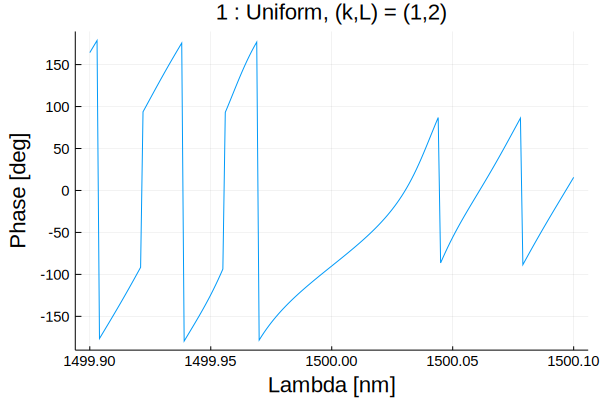

In [8]:
# 1_phase
del = 10^-6
ran = 1.5-del*100:del:1.5+del*100
x = [1000n for n in ran]
y = [180 * angle.(reflect_c(alpha(1,phi(xx,0.5)),1,2,phi(xx,0.5))) / pi for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "1 : Uniform, (k,L) = (1,2)")

#savefig("./image/1_p.png")

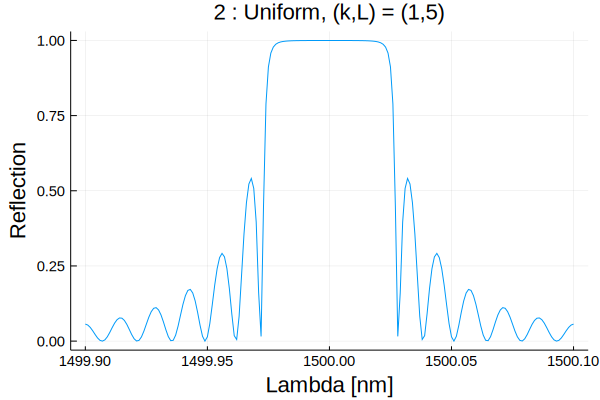

In [9]:
# 2_reflectance
del = 10^-6
ran = 1.5-del*100:del:1.5+del*100
x = [1000n for n in ran]
y = [reflect(alpha(1,phi(xx,0.5)),1,5,phi(xx,0.5)) for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "2 : Uniform, (k,L) = (1,5)")

#savefig("./image/2_r.png")

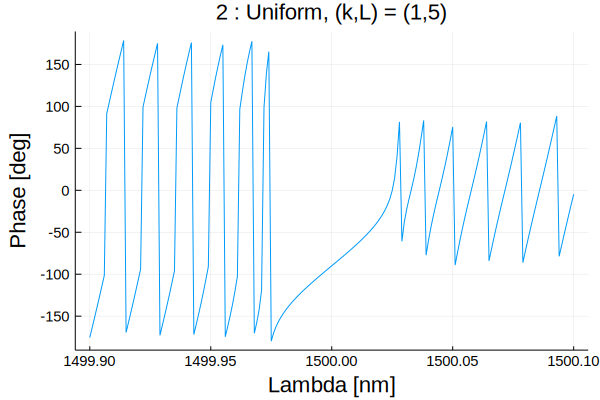

In [10]:
# 2_phase
del = 10^-6
ran = 1.5-del*100:del:1.5+del*100
x = [1000n for n in ran]
y = [180 * angle.(reflect_c(alpha(1,phi(xx,0.5)),1,5,phi(xx,0.5))) / pi for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "2 : Uniform, (k,L) = (1,5)")

#savefig("./image/2_p.png")

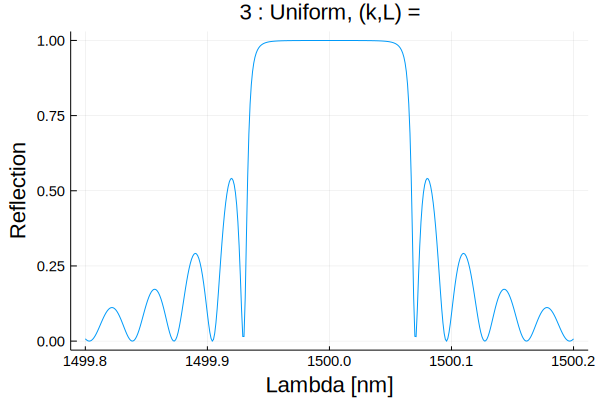

In [11]:
# 3_wide_reflectance 特性が見えるように波長範囲を広げた.
del = 10^-6
ran = 1.5-del*200:del:1.5+del*200
x = [1000n for n in ran]
y = [reflect(alpha(2.5,phi(xx,0.5)),2.5,2,phi(xx,0.5)) for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "3 : Uniform, (k,L) = ")

#savefig("./image/3_r.png")

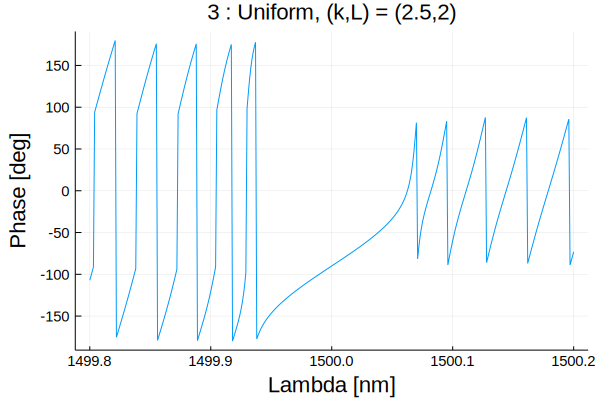

In [12]:
# 3_wide_phase
del = 10^-6
ran = 1.5-del*200:del:1.5+del*200
x = [1000n for n in ran]
y = [180 * angle.(reflect_c(alpha(2.5,phi(xx,0.5)),2.5,2,phi(xx,0.5))) / pi for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "3 : Uniform, (k,L) = (2.5,2)")

#savefig("./image/3_p.png")

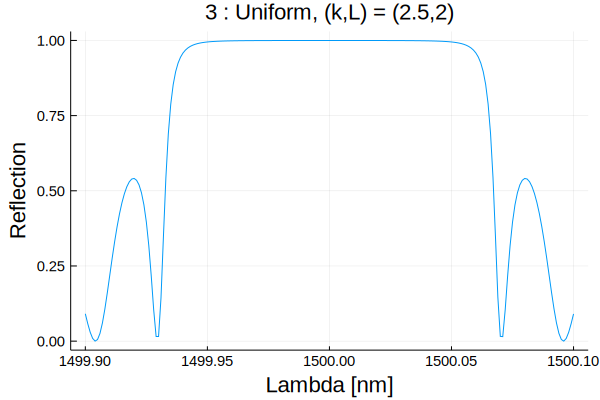

In [13]:
# 3_samescale_r 1,2と同じ波長範囲
del = 10^-6
ran = 1.5-del*100:del:1.5+del*100
x = [1000n for n in ran]
y = [reflect(alpha(2.5,phi(xx,0.5)),2.5,2,phi(xx,0.5)) for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "3 : Uniform, (k,L) = (2.5,2)")

#savefig("./image/3_s_r.png")

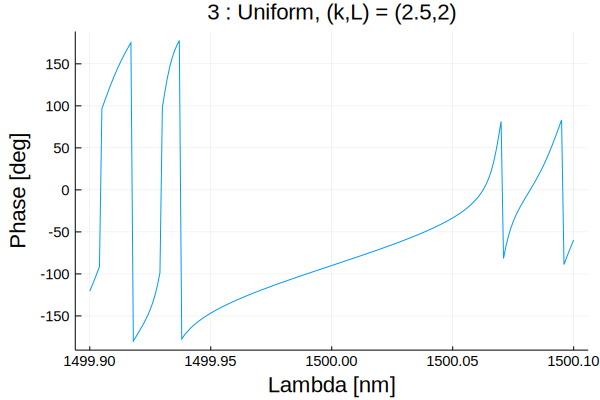

In [14]:
# 3_samescale_phase
del = 10^-6
ran = 1.5-del*100:del:1.5+del*100
x = [1000n for n in ran]
y = [180 * angle.(reflect_c(alpha(2.5,phi(xx,0.5)),2.5,2,phi(xx,0.5))) / pi for xx in ran]
plot(x,y,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "3 : Uniform, (k,L) = (2.5,2)")

#savefig("./image/3_p_s.png")

In [15]:
#=

4

=#

In [16]:
function k_4(z) # kappa
    return 5*exp(-1*z*z)
end

k_4 (generic function with 1 method)

In [17]:
function rgk(f,l,start,stop,len) # 4次のルンゲクッタ法. f:関数 l:波長 start,stop:zの範囲 len:分割数
    dz = (stop-start)/len
    r = 0 # r(L) = 0
    z = start
    for i in 0:len
        #print(f(start+(stop-start)*i/len)," ")
        k_1 = dz * f(z,r,l)
        k_2 = dz * f(z + dz/2, r + k_1/2,l)
        k_3 = dz * f(z + dz/2, r + k_2/2,l)
        k_4 = dz * f(z + dz, r + k_3,l)
        z = z + dz
        r = r + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
    end
    return r
end

rgk (generic function with 1 method)

In [18]:
function f4(z,r,l) # リカッチ方程式の右辺
    phi = ((2*pi*1.5/l) - (pi/0.5))*10000
    return -1*im*k_4(z)*(exp(2*im*phi*(2-z)) + r*r*exp(-2*im*phi*(2-z)))
end

f4 (generic function with 1 method)

In [45]:
function ref_4(l,start,stop,len) # 反射率
    return abs(rgk(f4,l,start,stop,len) * rgk(f4,l,start,stop,len))
end

ref_4 (generic function with 1 method)

In [46]:
function phase_4(l,start,stop,len) # 位相
    return 180 * angle.(rgk(f4,l,start,stop,len)) / pi
end

phase_4 (generic function with 1 method)

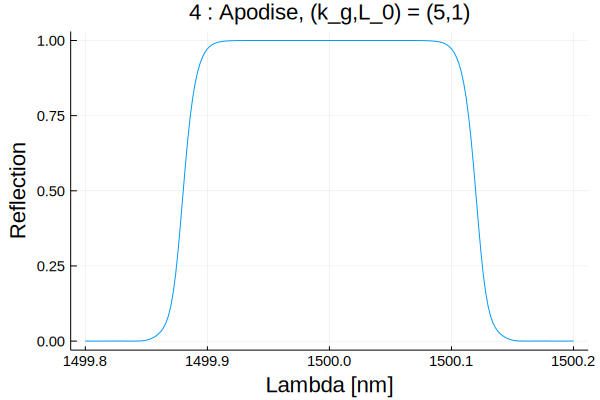

In [65]:
# 4_amplitude
del = 2*10^-6
ran = 1.5-del*100:del:1.5+del*100
x4_a = [1000n for n in ran]
y4_a = [ref_4(xx,-2,2,10000) for xx in ran]
plot(x4_a,y4_a,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "4 : Apodise, (k_g,L_0) = (5,1)")

#savefig("./image/4_r.png")

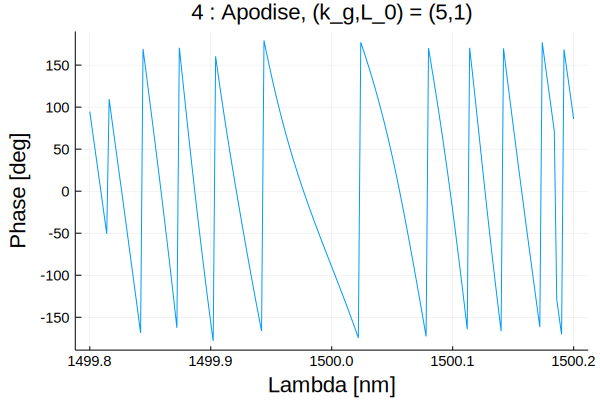

In [48]:
# 4_phase
del = 2*10^-6
ran = 1.5-del*100:del:1.5+del*100
x4_p = [1000n for n in ran]
y4_p = [phase_4(xx,-2,2,10000) for xx in ran]
plot(x4_p,y4_p,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "4 : Apodise, (k_g,L_0) = (5,1)")

#savefig("./image/4_p.png")

In [49]:
#=

5

=#

In [50]:
function f5(z,r,l) #0.5かけると反射率は近くなる?
    phi = ((2*pi*1.5/l) - (pi/0.5))*10000 + (pi*0.001*(5-z)/0.5)*10000
    return -1*im*2.5*(exp(2*im*phi*(5-z)) + 0*r*r*exp(-2*im*phi*(5-z)))
end

f5 (generic function with 1 method)

In [51]:
function ref_5(l,start,stop,len)
    return abs(rgk(f5,l,start,stop,len) * rgk(f5,l,start,stop,len))
end

ref_5 (generic function with 1 method)

In [52]:
function phase_5(l,start,stop,len)
    return 180 * angle.(rgk(f5,l,start,stop,len)) / pi
end

phase_5 (generic function with 1 method)

In [53]:
start_5 = 1.49 # 波長範囲
stop_5 = 1.52
del_5 = (stop_5-start_5)/400
ran_5 = start_5:del_5:stop_5

1.49:7.500000000000006e-5:1.52

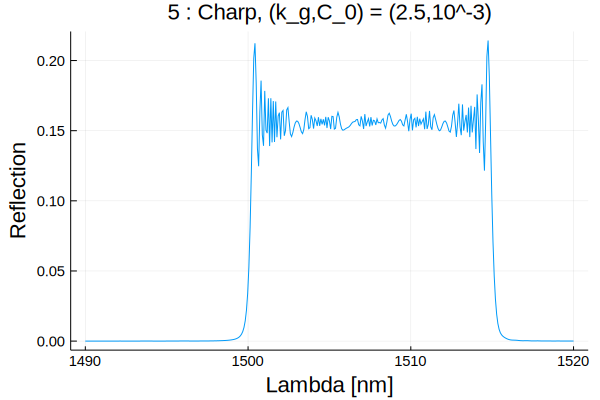

In [67]:
# 5_amplitude
x5_a = [n*1000 for n in ran_5]
y5_a = [ref_5(xx,0,5,10000) for xx in ran_5]
plot(x5_a,y5_a,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "5 : Charp, (k_g,C_0) = (2.5,10^-3)")

#savefig("./image/5_r.png")

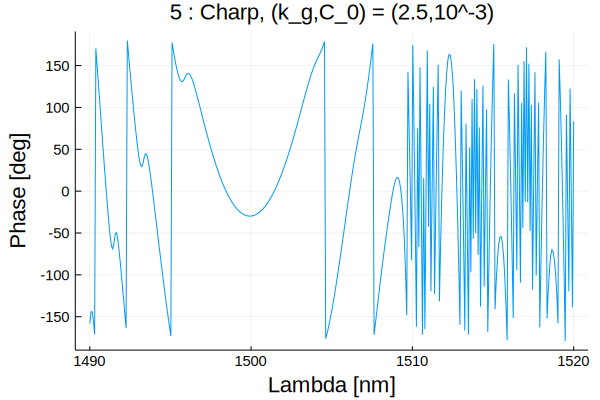

In [55]:
# 5_phase
x5_p = [1000n for n in ran_5]
y5_p = [phase_5(xx,-2,2,10000) for xx in ran_5]
plot(x5_p,y5_p,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "5 : Charp, (k_g,C_0) = (2.5,10^-3)")

#savefig("./image/5_p.png")

In [30]:
#=

6

=#

In [56]:
function k_6(z) # サンプル関数
    
    # abs:0~0.01, 0.19~0.21, 0.39~0.41, ... , 4.79~4.81, 4.99~5 -> 2.5
    a = 100*abs(z)+1 # a : 1~2, 20~22, 40~42, ... , 480~482, 500~501
    b = a - 20*div(a,20)
    if(b <= 2)
        return 2.5
    else
        return 0
    end
end

k_6 (generic function with 1 method)

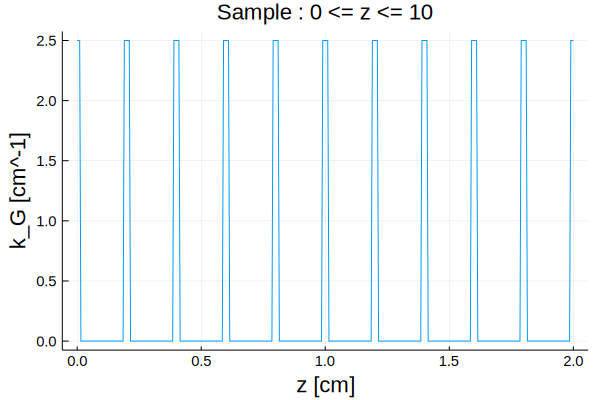

In [57]:
ran_k = 0:0.005:2
x5_k = [n for n in ran_k]
y5_k = [k_6(xx) for xx in ran_k]
plot(x5_k,y5_k,label = "",xlabel="z [cm]",ylabel = "k_G [cm^-1]",title = "Sample : 0 <= z <= 10")

#savefig("./image/sample.png")

In [58]:
function f6(z,r,l)
    phi = ((2*pi*1.5/l) - (pi/0.5))*10000
    return -1*im*k_6(z)*(exp(2*im*phi*(-z)) + r*r*exp(-2*im*phi*(-z)))
end

f6 (generic function with 1 method)

In [59]:
function ref_6(l,start,stop,len)
    return abs(rgk(f6,l,start,stop,len) * rgk(f6,l,start,stop,len))
end

ref_6 (generic function with 1 method)

In [60]:
function phase_6(l,start,stop,len)
    return 180 * angle.(rgk(f6,l,start,stop,len)) / pi
end

phase_6 (generic function with 1 method)

In [61]:
start_6 = 1.495
stop_6 = 1.505
del_6 = (stop_6-start_6)/400
ran_6 = start_6:del_6:stop_6

1.495:2.4999999999999466e-5:1.505

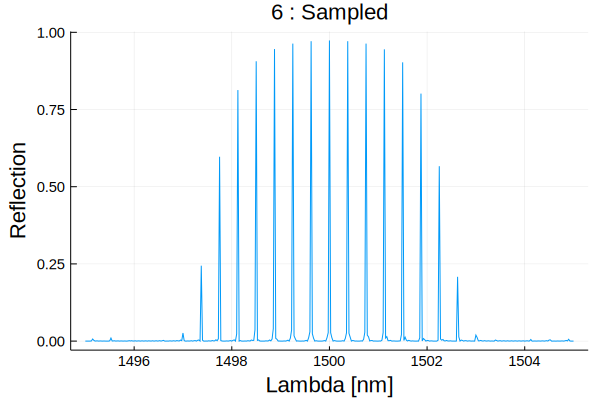

In [69]:
# 6_amplitude
x6_a = [1000n for n in ran_6]
y6_a = [ref_6(xx,-5,5,10000) for xx in ran_6]
plot(x6_a,y6_a,label = "",xlabel="Lambda [nm]",ylabel = "Reflection",title = "6 : Sampled")

#savefig("./image/6_r.png")

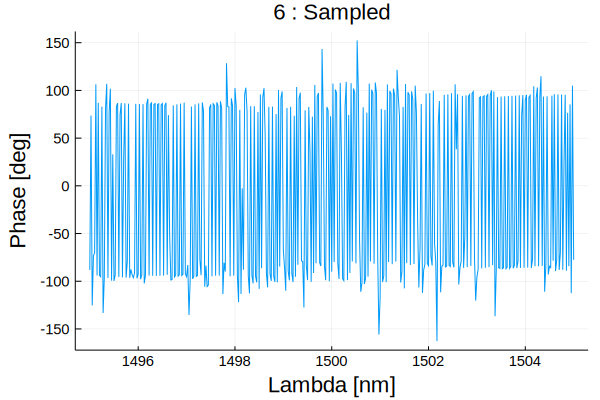

In [63]:
# 6_phase
x6_p = [1000n for n in ran_6]
y6_p = [phase_6(xx,-5,5,10000) for xx in ran_6]
plot(x6_p,y6_p,label = "",xlabel="Lambda [nm]",ylabel = "Phase [deg]",title = "6 : Sampled")

#savefig("./image/6_p.png")